# ML Assignment 2 : Group: 119

## Problem Statement:

Data were collected on 81 patients undergoing corrective spinal surgery (Bell et al., 1989). The objective was to determine important risk factors for kyphosis following surgery. The risk factors are age in years, the starting vertebrae level of the surgery, and the number of levels involved.



For the dataset, implement the Random Forest classifier using Python. [6M]

The marks distribution is as follows
<ul>
<li>Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
<li>Split features and labels [0.5M]
<li>Split train and test data [0.5M}
<li>Implement Random Forest Classifier [2M]
<li>Calculate accuracy measures [2M]
</ul>


For the same dataset, implement classification with KNN using Python. [6M]

The marks distribution is as follows
<ul>
<li>Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
<li>Split features and labels [0.5M]
<li>Split train and test data [0.5M}
<li>Implement KNN Classifier [2M]
<li>Calculate accuracy measures [2M]
</ul> 

Compare the results and accuracies for both the algorithms and share your inferences. [1M]


### Contributors
J Manoj Balaji (2019AB04228@wilp.bits-pilani.ac.in) <br>
Siddharth Verma (2019AD04097@wilp.bits-pilani.ac.in) <br>
Randeep Singh (2019AD04069@wilp.bits-pilani.ac.in) <br>



### Import the libraries and Load the dataset and Remove/replace missing values (if any)

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


#### Age Distribution is from 1 to 206, we are assuming it is in months.

### Split features and labels

In [5]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

### Split train and test data 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
X_train[:5], X_test[:5]

(array([[0.32682927, 0.375     , 0.52941176],
        [0.        , 0.125     , 0.47058824],
        [0.69268293, 0.875     , 0.11764706],
        [0.76097561, 0.125     , 0.70588235],
        [0.67317073, 0.125     , 0.52941176]]),
 array([[0.90721649, 0.        , 0.8125    ],
        [0.58247423, 1.        , 0.4375    ],
        [0.41752577, 0.6       , 0.8125    ],
        [0.01546392, 0.2       , 0.9375    ],
        [0.18041237, 0.4       , 0.75      ]]))

In [9]:
X_train.shape, X_test.shape

((64, 3), (17, 3))

In [10]:
Counter(y_train), Counter(y_test)

(Counter({'absent': 51, 'present': 13}), Counter({'absent': 13, 'present': 4}))

## Random Forest

In [11]:
num_of_trees = list(range(2,20,2))
train_results = []
test_results = []
for n in num_of_trees:
   model = RandomForestClassifier(n_estimators=n, random_state=42)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   train_accuracy = accuracy_score(y_train, train_pred)
   train_results.append(train_accuracy)
   y_pred = model.predict(X_test)
   test_accuracy = accuracy_score(y_test, y_pred)
   test_results.append(test_accuracy)

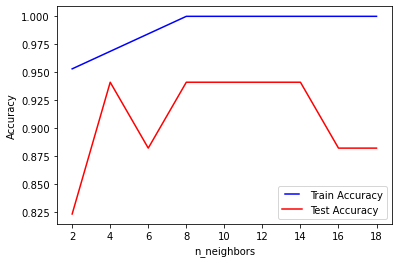

In [12]:
line1, = plt.plot(num_of_trees, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(num_of_trees, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.show()

In [13]:
rfc = RandomForestClassifier(n_estimators=4, random_state=42)

In [14]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=42)

In [15]:
rfc_pred = rfc.predict(X_test)

In [16]:
train_pred = rfc.predict(X_train)

### Calculate accuracy measures

In [17]:
print("Training Accuracy: ",accuracy_score(y_train,train_pred))
print("Test Accuracy: ",accuracy_score(y_test,rfc_pred))

Training Accuracy:  0.96875
Test Accuracy:  0.9411764705882353


In [18]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[13  0]
 [ 1  3]]


              precision    recall  f1-score   support

      absent       0.93      1.00      0.96        13
     present       1.00      0.75      0.86         4

    accuracy                           0.94        17
   macro avg       0.96      0.88      0.91        17
weighted avg       0.95      0.94      0.94        17



## KNN

In [19]:
neighbors = list(range(1,10))
train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   train_accuracy = accuracy_score(y_train, train_pred)
   
   train_results.append(train_accuracy)
   y_pred = model.predict(X_test)
   test_accuracy = accuracy_score(y_test, y_pred)
  
   test_results.append(test_accuracy)

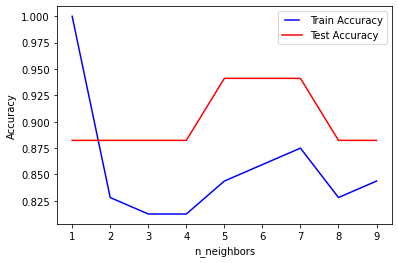

In [20]:
line1, = plt.plot(neighbors, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(neighbors, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)

train_pred = knn.predict(X_train)

### Accuracy measures Calculation

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9411764705882353


In [23]:
print("Training Accuracy: ",accuracy_score(y_train,train_pred))
print("Test Accuracy: ",accuracy_score(y_test,y_pred))

Training Accuracy:  0.84375
Test Accuracy:  0.9411764705882353


### Accuracy Comparison and Inference